In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [20]:
obs_groups = pd.read_csv("../cosmicflows/Kourkchi-Tully-Groups.csv")

   pgc  PGC1
0   35    35
1   38    38
2   43    43
3  143   143
4  156   218
5  171   171
6  181   181
7  187   187
8  218   218
9  255   218


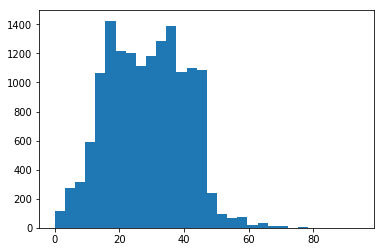

In [21]:
print(obs_groups[0:10][['pgc','PGC1']])
obs_groups['SGD'] = np.sqrt(obs_groups['SGX']**2 + obs_groups['SGY']**2 + obs_groups['SGZ']**2)
_= plt.hist(obs_groups['SGD'], bins=30)

In [22]:
print(obs_groups.keys())

Index(['pgc', 'Name', 'RA', 'DE', 'GLong', 'GLat', 'SGL', 'SGB', 'Ty', 'B_t',
       'K_t', 'lgL_K', 'Vhel', 'Vls', 'D_i', 'eDi', 'PGC1', 'PGC1+', 'Ng',
       'gGLong', 'gGLat', 'gSGL', 'gSGB', 'gK_t', 'glgL_K', 'gVh', 'gVls',
       'gND', 'gD', 'geD', 'gsigL', 'gsigV', 'gR2t', 'gRdyn', 'gMassL',
       'gMassdyn', 'SGX', 'SGY', 'SGZ', 'SGD'],
      dtype='object')


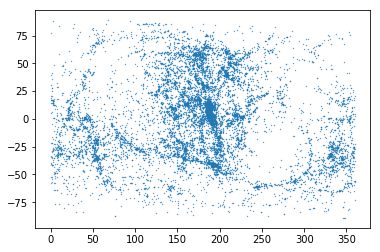

In [23]:
ii = obs_groups['D_i']==0.0
plt.scatter(obs_groups['RA'][ii], obs_groups['DE'][ii], s=0.1)

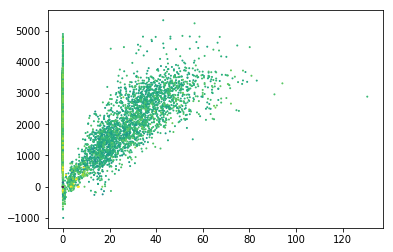

In [24]:
plt.scatter(obs_groups['D_i'], obs_groups['Vhel'], c=obs_groups['K_t'], s=1.0)

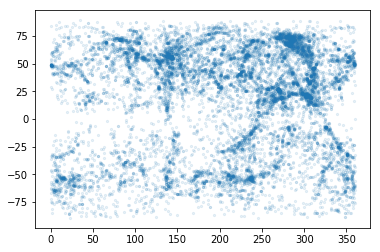

In [25]:
plt.scatter(obs_groups['GLong'], obs_groups['GLat'], alpha=0.1, s=5.0)

In [34]:
def read_pos_write_ascii(filenamein):
    filenameout = filenamein.replace('hdf5', 'txt')
    filenameout = filenameout.replace('galaxies', 'pos_galaxies')
    print(filenameout)
    f = h5py.File(filenamein, 'r')
    x = f['SGX']
    y = f['SGY']
    z = f['SGZ']
    pos = np.array([x,y,z])
    f.close()
    np.savetxt(filenameout, pos.T)
    
def write_data(obs_groups, cut_name='Vhel', cut_value=3500):
    #we cut the data to limit it in 3500 km/s in radial velocity
    ii = obs_groups[cut_name]<cut_value
    obs_groups_cut = obs_groups[ii]
    print(len(obs_groups), len(obs_groups_cut))

    # we store the galaxies in three different data sets:
    # northern galactic latitude
    # southern galacitc latitude
    # full set

    ii_north = obs_groups_cut['GLat']>0
    ii_south = obs_groups_cut['GLat']<0

    obs_groups_south = obs_groups_cut[ii_south]
    obs_groups_north = obs_groups_cut[ii_north]

    properties=['pgc','K_t','PGC1', 'SGX', 'SGY', 'SGZ', 'Vhel', 'SGD']

    filename = '../cosmicflows/galaxies_south_cut_{}.hdf5'.format(cut_name)
    f = h5py.File(filename, 'w')
    for p in properties:
        f.create_dataset(p, data=obs_groups_south[p])
    f.close()
    read_pos_write_ascii(filename)

    filename = '../cosmicflows/galaxies_north_cut_{}.hdf5'.format(cut_name)
    f = h5py.File(filename, 'w')
    for p in properties:
        f.create_dataset(p, data=obs_groups_north[p])
    f.close()
    read_pos_write_ascii(filename)
    
    filename = '../cosmicflows/galaxies_all_cut_{}.hdf5'.format(cut_name)
    f = h5py.File(filename, 'w')
    for p in properties:
        f.create_dataset(p, data=obs_groups_cut[p])
    f.close()
    read_pos_write_ascii(filename)

    

In [35]:
write_data(obs_groups, cut_name='Vhel', cut_value=3500)
write_data(obs_groups, cut_name='SGD', cut_value=35)

14989 14217
../cosmicflows/pos_galaxies_south_cut_Vhel.txt
../cosmicflows/pos_galaxies_north_cut_Vhel.txt
../cosmicflows/pos_galaxies_all_cut_Vhel.txt
14989 9976
../cosmicflows/pos_galaxies_south_cut_SGD.txt
../cosmicflows/pos_galaxies_north_cut_SGD.txt
../cosmicflows/pos_galaxies_all_cut_SGD.txt
